In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score,\
f1_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier


In [2]:
# Surpress warnings:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [3]:
df = pd.read_csv('Cancer_Data.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
df_cleaned = df.copy()
df_cleaned = df_cleaned.drop(['id','Unnamed: 32'], axis=1)

In [5]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [6]:
df_cleaned.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [7]:
df_cleaned.duplicated().sum()

0

In [8]:
df_cleaned['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

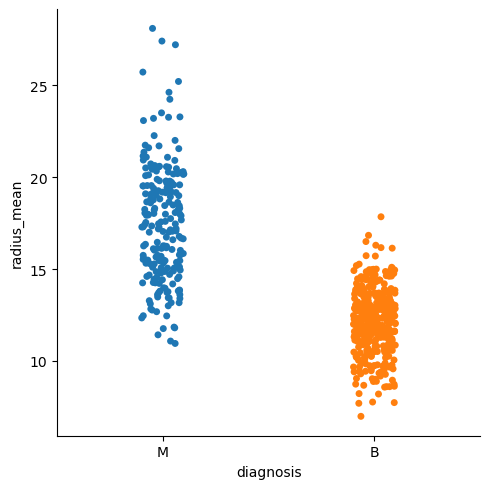

In [9]:
sns.catplot(x = "diagnosis", y = "radius_mean", data = df_cleaned)

In [10]:
#not using one-hot encoding because I want to use this as a target variable for the prediction
df_cleaned.diagnosis.replace({'M':1, 'B':0}, inplace=True)
df_cleaned.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


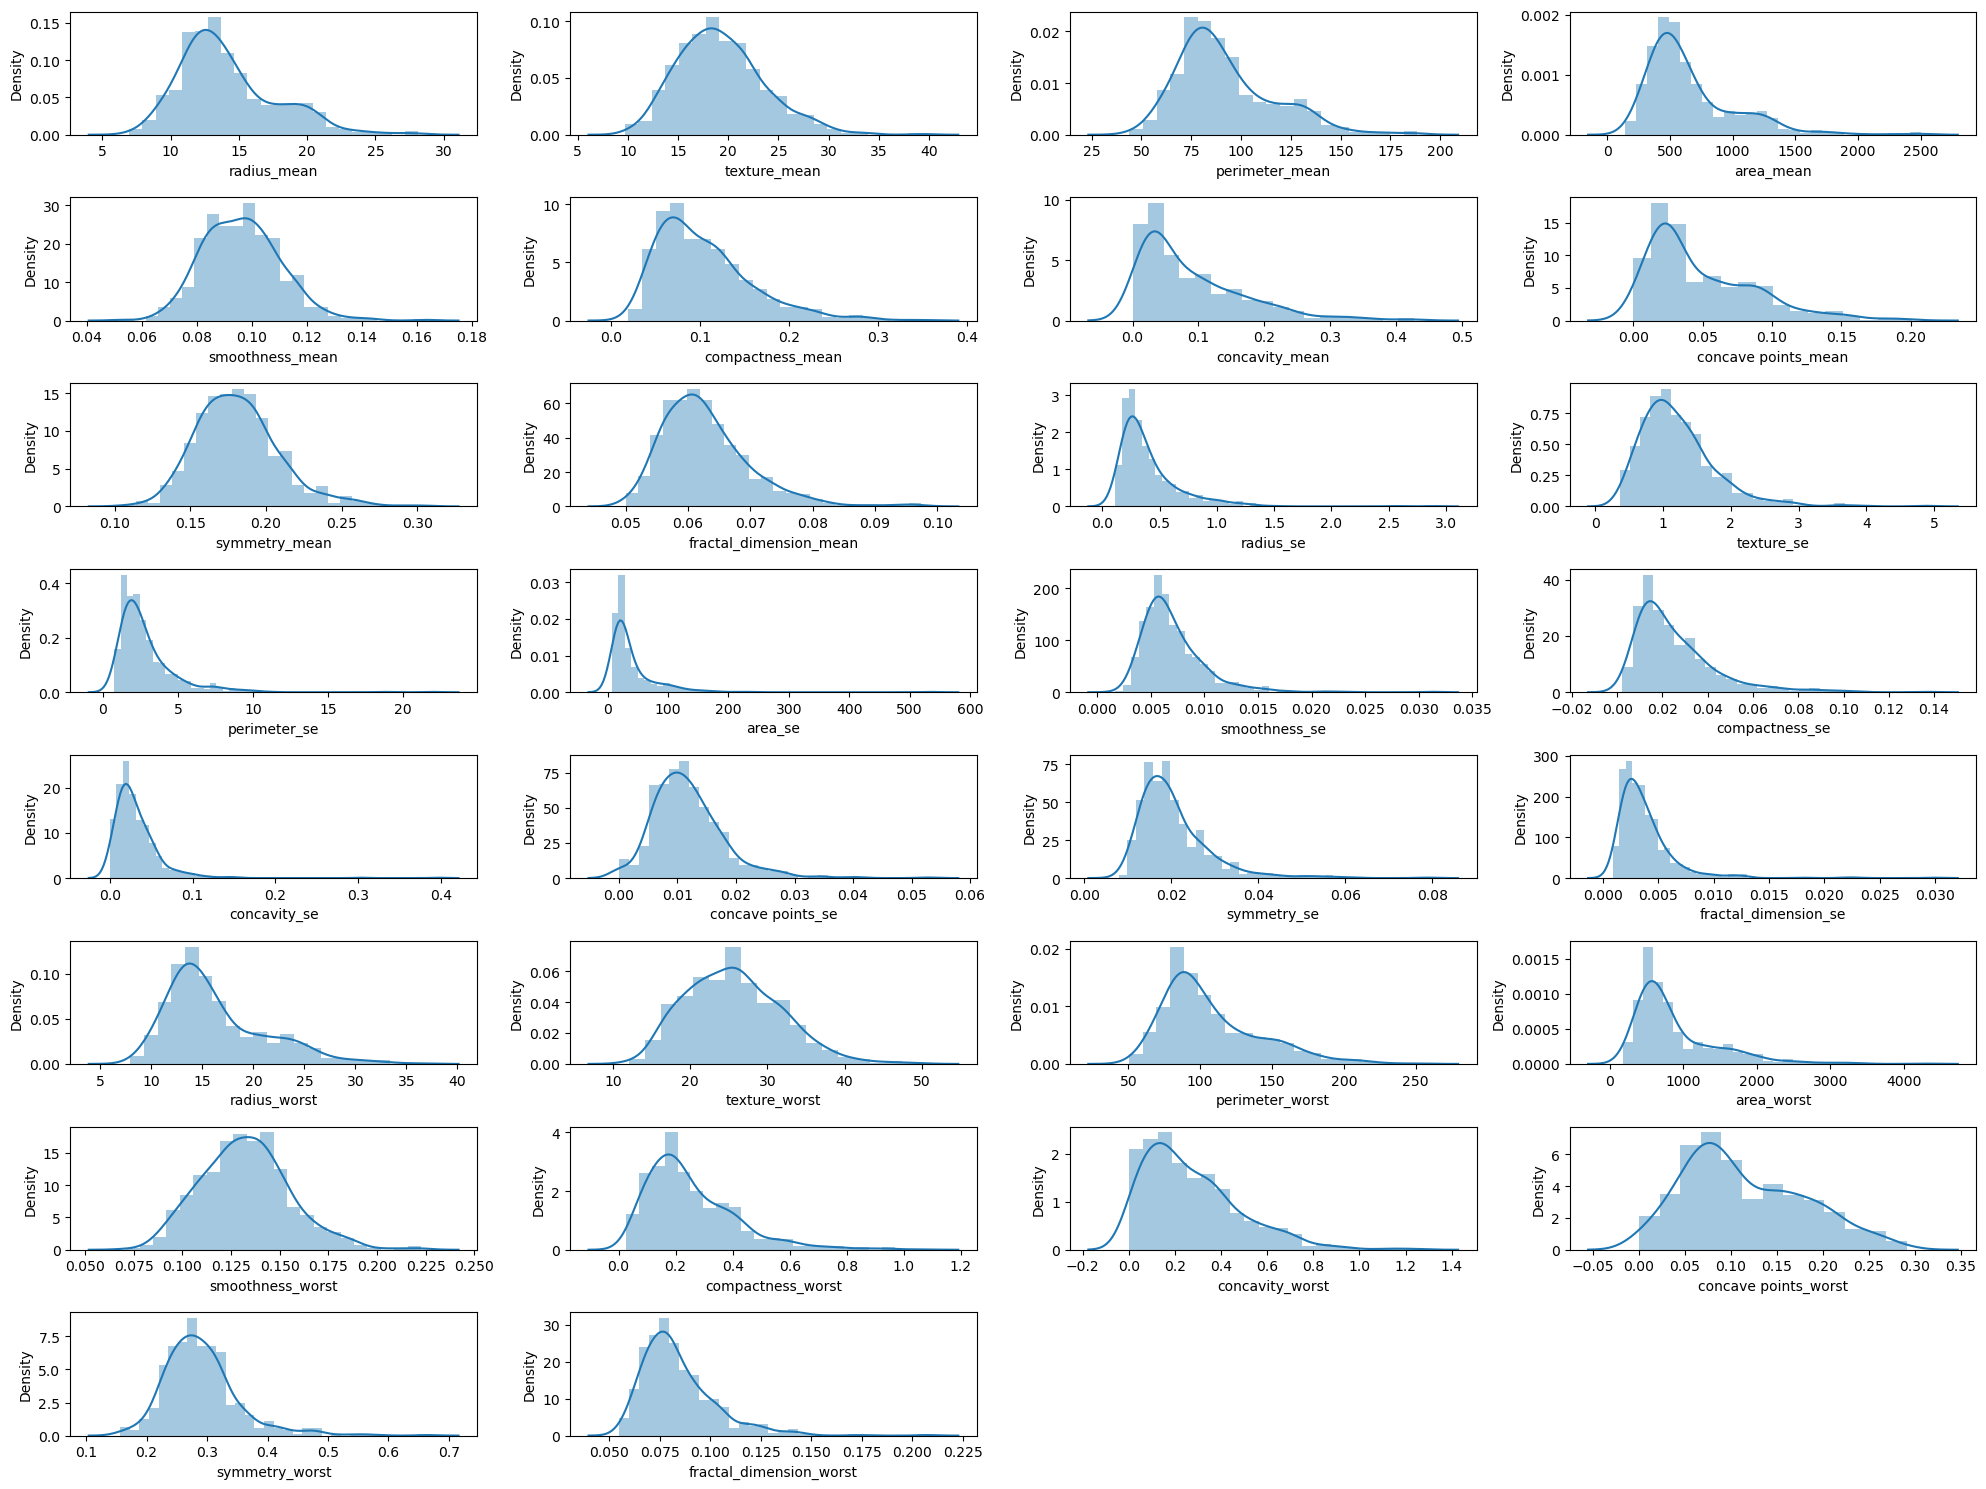

In [11]:
features = list(df_cleaned.select_dtypes(include = np.number).columns)
features.remove('diagnosis')

plt.subplots(figsize=(20,15))
 
for i, col in enumerate(features):
  plt.subplot(8,4, i + 1)
  sns.distplot(df_cleaned[col])
plt.tight_layout()
plt.show()

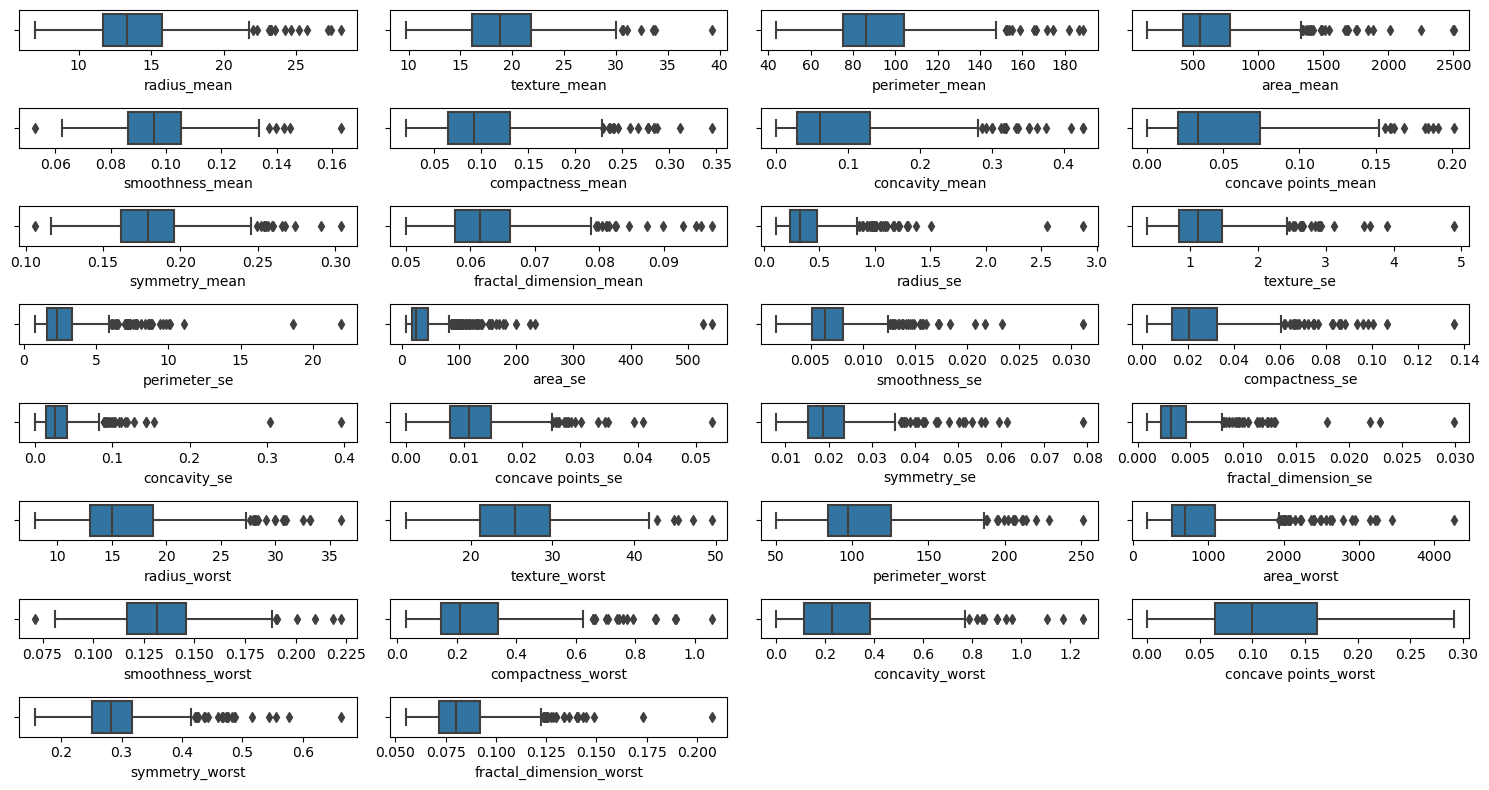

In [12]:
plt.subplots(figsize=(15,8))
 
for i, col in enumerate(features):
  plt.subplot(8,4, i + 1)
  sns.boxplot(df_cleaned[col])
plt.tight_layout()
plt.show()

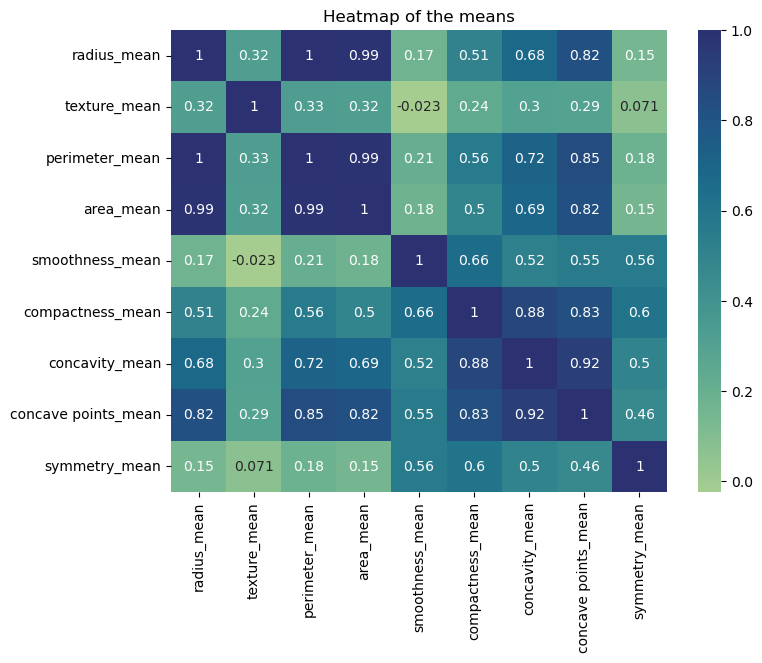

In [13]:
# Create a heatmap of the 'mean' values to visualize how correlated variables are
plt.figure(figsize=(8, 6))
sns.heatmap(df_cleaned[['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean','compactness_mean', 
                        'concavity_mean', 'concave points_mean', 'symmetry_mean']].corr(), annot=True, cmap="crest")
plt.title('Heatmap of the means')
plt.show()

In [14]:
sns.pairplot(df_cleaned);

In [15]:
df_cleaned.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [16]:
# Random tree

As such, it includes two approaches to validation: cross-validating the training data and validating using a separate validation dataset. In practice, you generally will only use one or the other for a given project.

Cross-validation is more rigorous, because it maximizes the usage of the training data, but if you have a very large dataset or limited computing resources, it may be better to validate with a separate validation dataset.

In [17]:
y = df_cleaned["diagnosis"]


X = df_cleaned.copy()
X = X.drop("diagnosis", axis = 1)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=42)

Cross-validated hyperparameter tuning

In [18]:
%%time

rf = RandomForestClassifier(random_state=0)

cv_params = {'max_depth': [2,3,4,5, None], 
             'min_samples_leaf': [1,2,3],
             'min_samples_split': [2,3,4],
             'max_features': [2,3,4],
             'n_estimators': [75, 100, 125, 150]
             }  

scoring = {'accuracy', 'precision', 'recall', 'f1'}

rf_cv = GridSearchCV(rf, cv_params, scoring=scoring, cv=5, refit='f1')

rf_cv.fit(X_train, y_train)

Wall time: 6min 10s


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0),
             param_grid={'max_depth': [2, 3, 4, 5, None],
                         'max_features': [2, 3, 4],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [75, 100, 125, 150]},
             refit='f1', scoring={'accuracy', 'f1', 'recall', 'precision'})

In [19]:
rf_cv.best_params_

{'max_depth': None,
 'max_features': 2,
 'min_samples_leaf': 1,
 'min_samples_split': 3,
 'n_estimators': 125}

And to check the best average F1 score of this model on the validation folds, we can use the best_score_ attribute. Remember, if we had instead set refit=recall when we instantiated our GridSearchCV object earlier, then calling best_score_ would return the best recall score, and the best parameters might not be the same as what they are in the above cell, because the model would be optimizing for a different metric.

In [20]:
rf_cv.best_score_

0.9552348950332821

In [21]:
def make_results(model_name, model_object):
    '''
    Accepts as arguments a model name (your choice - string) and
    a fit GridSearchCV model object.

    Returns a pandas df with the F1, recall, precision, and accuracy scores
    for the model with the best mean F1 score across all validation folds.
    '''

    # Get all the results from the CV and put them in a df
    cv_results = pd.DataFrame(model_object.cv_results_)

    # Isolate the row of the df with the max(mean f1 score)
    best_estimator_results = cv_results.iloc[cv_results['mean_test_f1'].idxmax(), :]

    # Extract accuracy, precision, recall, and f1 score from that row
    f1 = best_estimator_results.mean_test_f1
    recall = best_estimator_results.mean_test_recall
    precision = best_estimator_results.mean_test_precision
    accuracy = best_estimator_results.mean_test_accuracy

    # Create table of results
    table = pd.DataFrame({'Model': [model_name],
                          'F1': [f1],
                          'Recall': [recall],
                          'Precision': [precision],
                          'Accuracy': [accuracy]
                         }
                        )

    return table

In [22]:
# Make a results table for the rf_cv model using above function
rf_cv_results = make_results('Random Forest CV', rf_cv)
rf_cv_results

,Model,F1,Recall,Precision,Accuracy
0,Random Forest CV,0.955235,0.937097,0.974395,0.967114


Hyperparameters tuned with separate validation set

In [23]:
# Create separate validation data
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size=0.2, 
                                            stratify=y_train, random_state=10)

In [24]:
# Create list of split indices
split_index = [0 if x in X_val.index else -1 for x in X_train.index]
from sklearn.model_selection import PredefinedSplit

In [25]:
rf = RandomForestClassifier(random_state=0)

cv_params = {'max_depth': [2,3,4,5, None], 
             'min_samples_leaf': [1,2,3],
             'min_samples_split': [2,3,4],
             'max_features': [2,3,4],
             'n_estimators': [75, 100, 125, 150]
             }  

scoring = {'accuracy', 'precision', 'recall', 'f1'}

custom_split = PredefinedSplit(split_index)

rf_val = GridSearchCV(rf, cv_params, scoring=scoring, cv=custom_split, refit='f1')

In [26]:
rf_val.fit(X_train, y_train)

GridSearchCV(cv=PredefinedSplit(test_fold=array([-1,  0, ..., -1,  0])),
             estimator=RandomForestClassifier(random_state=0),
             param_grid={'max_depth': [2, 3, 4, 5, None],
                         'max_features': [2, 3, 4],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [75, 100, 125, 150]},
             refit='f1', scoring={'accuracy', 'f1', 'recall', 'precision'})

In [27]:
rf_val.best_params_

{'max_depth': 3,
 'max_features': 2,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 75}

In [28]:
rf_val.best_score_

0.9846153846153847

In [29]:
rf_val_results = make_results('Random Forest Validated', rf_val)
rf_val_results

,Model,F1,Recall,Precision,Accuracy
0,Random Forest Validated,0.984615,1.0,0.969697,0.988372


In [30]:
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [31]:
# Assuming 'df' is your DataFrame with tumor data
# Adjust the column names as per your dataset
# features = df.drop('category_column', axis=1).values
# labels = df['category_column'].values

x_pt = df_cleaned.drop('diagnosis', axis=1).values
y_pt = df_cleaned['diagnosis'].values

# Standardize the features
scaler = StandardScaler()
features = scaler.fit_transform(x_pt)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, y_pt, test_size=0.2, random_state=42)


y = df_cleaned["diagnosis"]


X = df_cleaned.copy()
X = X.drop("diagnosis", axis = 1)

In [32]:
# simple neural network model using PyTorch
class TumorClassifier(nn.Module):
    def __init__(self, input_size):
        super(TumorClassifier, self).__init__()
        self.fc1 = nn.Linear(input_size, 64)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(64, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.sigmoid(x)
        return x


In [33]:
#  training loop and train the model


In [34]:
# Convert data to PyTorch tensors
X_train_tensor = torch.FloatTensor(X_train)
y_train_tensor = torch.FloatTensor(y_train).view(-1, 1)

# Initialize the model, loss function, and optimizer
model = TumorClassifier(input_size=X_train.shape[1])
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
epochs = 1000
for epoch in range(epochs):
    optimizer.zero_grad()
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    loss.backward()
    optimizer.step()

    if epoch % 100 == 0:
        print(f'Epoch [{epoch}/{epochs}], Loss: {loss.item()}')


Epoch [0/1000], Loss: 0.704947829246521
Epoch [100/1000], Loss: 0.11459831148386002
Epoch [200/1000], Loss: 0.0649203434586525
Epoch [300/1000], Loss: 0.04669766128063202
Epoch [400/1000], Loss: 0.03560834750533104
Epoch [500/1000], Loss: 0.027565089985728264
Epoch [600/1000], Loss: 0.021168971434235573
Epoch [700/1000], Loss: 0.016273632645606995
Epoch [800/1000], Loss: 0.012654111720621586
Epoch [900/1000], Loss: 0.00993454921990633


In [35]:
# Evaluate the Model
X_test_tensor = torch.FloatTensor(X_test)

with torch.no_grad():
    predictions = model(X_test_tensor)
    predicted_labels = (predictions > 0.5).float()

# Convert true labels to PyTorch tensor
y_test_tensor = torch.FloatTensor(y_test).view(-1, 1)

# Calculate accuracy
correct_predictions = (predicted_labels == y_test_tensor).sum().item()
total_samples = len(y_test)
accuracy = correct_predictions / total_samples
print(f'Test Accuracy: {accuracy * 100:.2f}%')

Test Accuracy: 97.37%
